# **Testing of the sampling algorithms**

In this jupyter notebook we will be testing and showcasing our library SamplingLIB. It includes sampling algorithms along with some helper functions for visualization and benchmarking.

Sampling algorithms:
1. Random Walk Metropolis Hastings (MH)
2. Adaptive Metropolis (AM)
3. Delayed Rejection Adaptive Metropolis (DRAM)
4. DiffeRential Evolution Adaptive Metropolis (DREAM)

**We load classes from SamplingLIB and other requiered libraries**

In [1]:
from SamplingLIB import Sampling, MH, AM, DRAM, DREAM
import numpy as np
import matplotlib.pyplot as plt

## **Testing data**

We create a few distribution function to demonstrate our methods on.

### **Donut distribution (dim=2)**

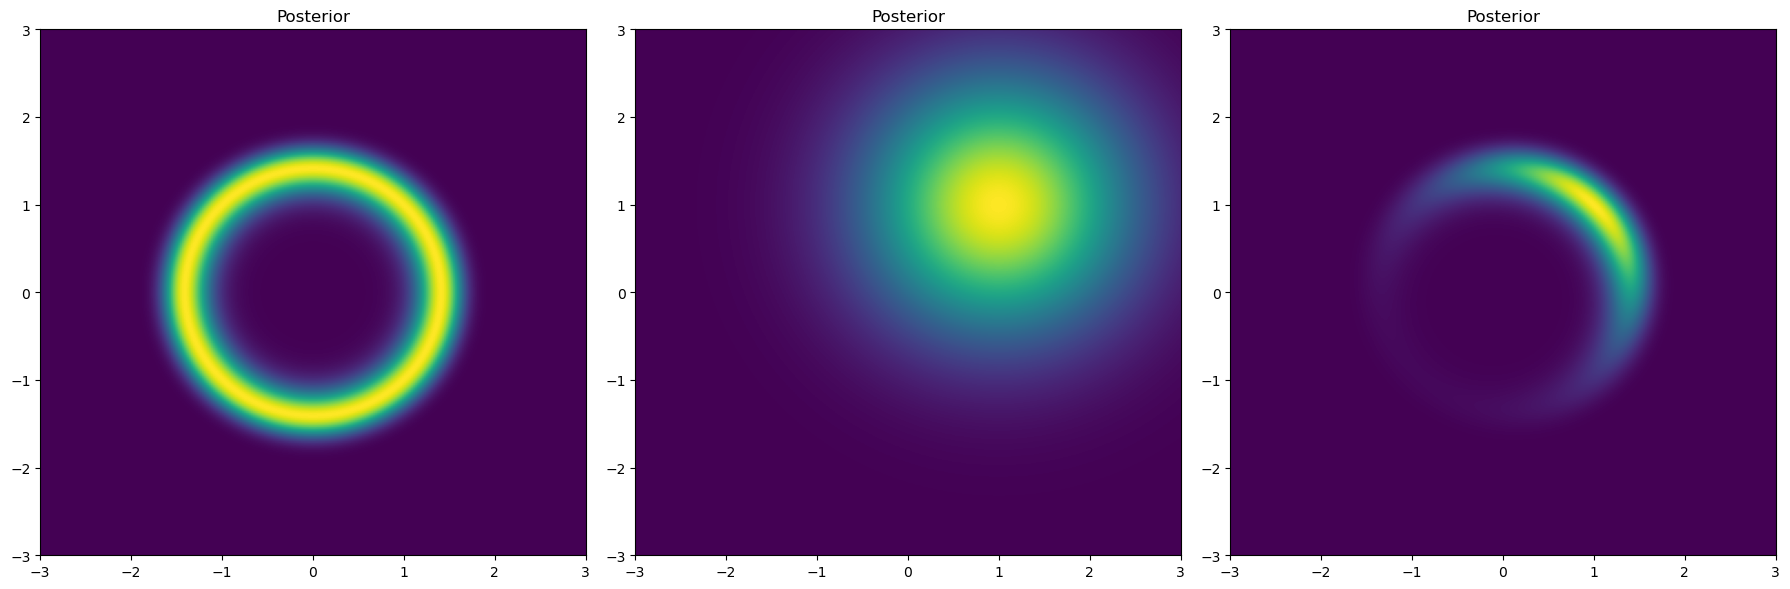

In [2]:
# Parameters
donut_dim = 2
log = True

# Likelihood
donut_y = 2.0  # observation
donut_noise = 0.5  # noise standard deviation
def donut_forward(u):
    return (u[0]**2+u[1]**2)

# Prior
prior_means = [[1.0, 1.0]]
prior_stds = [[1.0, 1.0]]

donut = Sampling(dimension=donut_dim, forward_model=donut_forward, observed_data=donut_y, noise_std=donut_noise, prior_means=prior_means, prior_stds=prior_stds, log=log)
donut.visualize(max_points=300, ranges=[(-3, 3), (-3, 3)], visuals=[donut.likelihood, donut.prior, donut.posterior])

### **Rosenbrock (Banana) distribution (dim=2)**

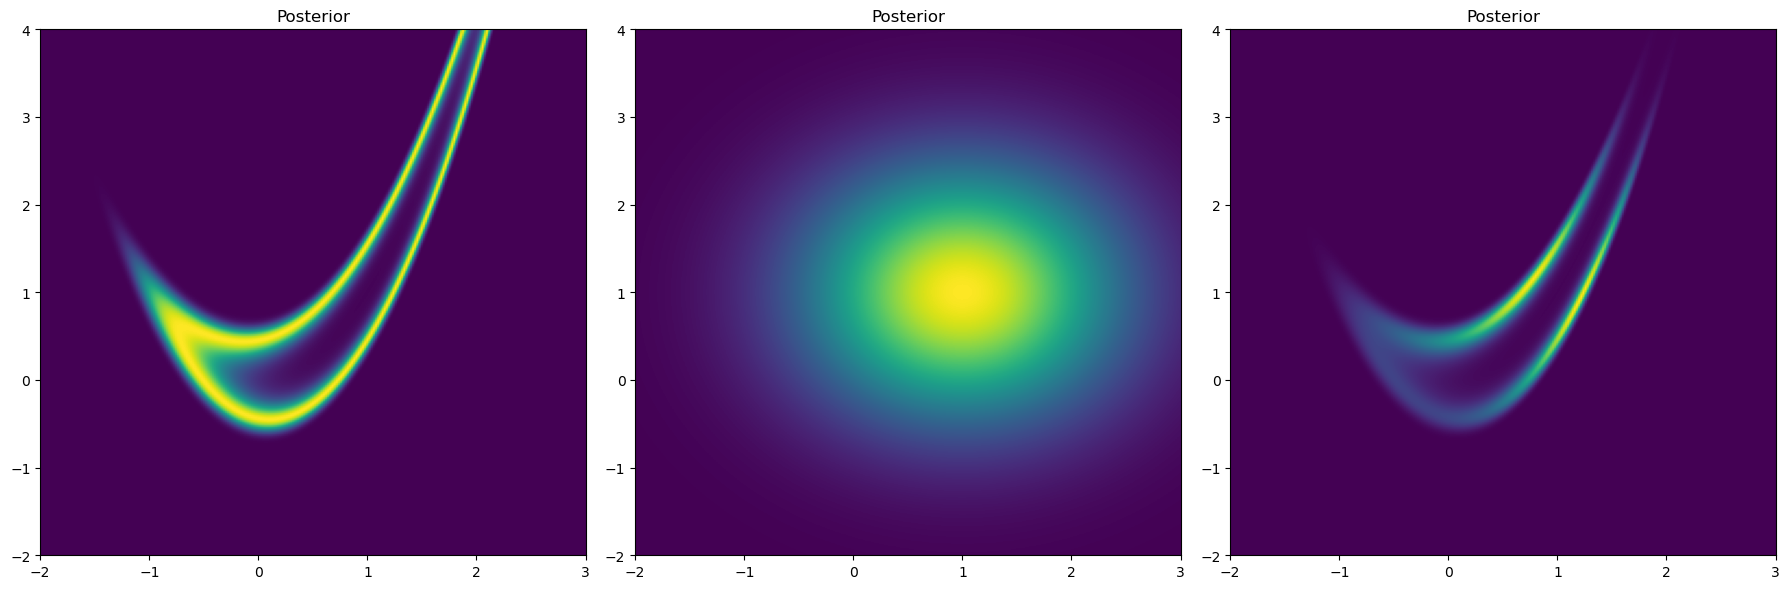

In [3]:
# Parameters
banana_dim = 2
log = True

# Likelihood
banana_y = 3.0  # observation
banana_noise = 1.0  # noise standard
def banana_forward(u):
    a = 1.0
    b = 10.0
    return (a-u[0])**2 + b*(u[1]-(u[0])**2)**2

# Prior
prior_means = [[1.0, 1.0]]
prior_stds = [[1.0, 1.0]]

banana = Sampling(dimension=banana_dim, forward_model=banana_forward, observed_data=banana_y, noise_std=banana_noise, prior_means=prior_means, prior_stds=prior_stds, log=log)
banana.visualize(max_points=300, ranges=[(-2, 3), (-2, 4)], visuals=[banana.likelihood, banana.prior, banana.posterior])

### **Wave distribution (dim=2)**

In [4]:
# def hard_G(u):  # forward model
#    return np.sin(np.cos(np.tan(u[0]))) * np.sin(np.cos(np.tan(u[1])))

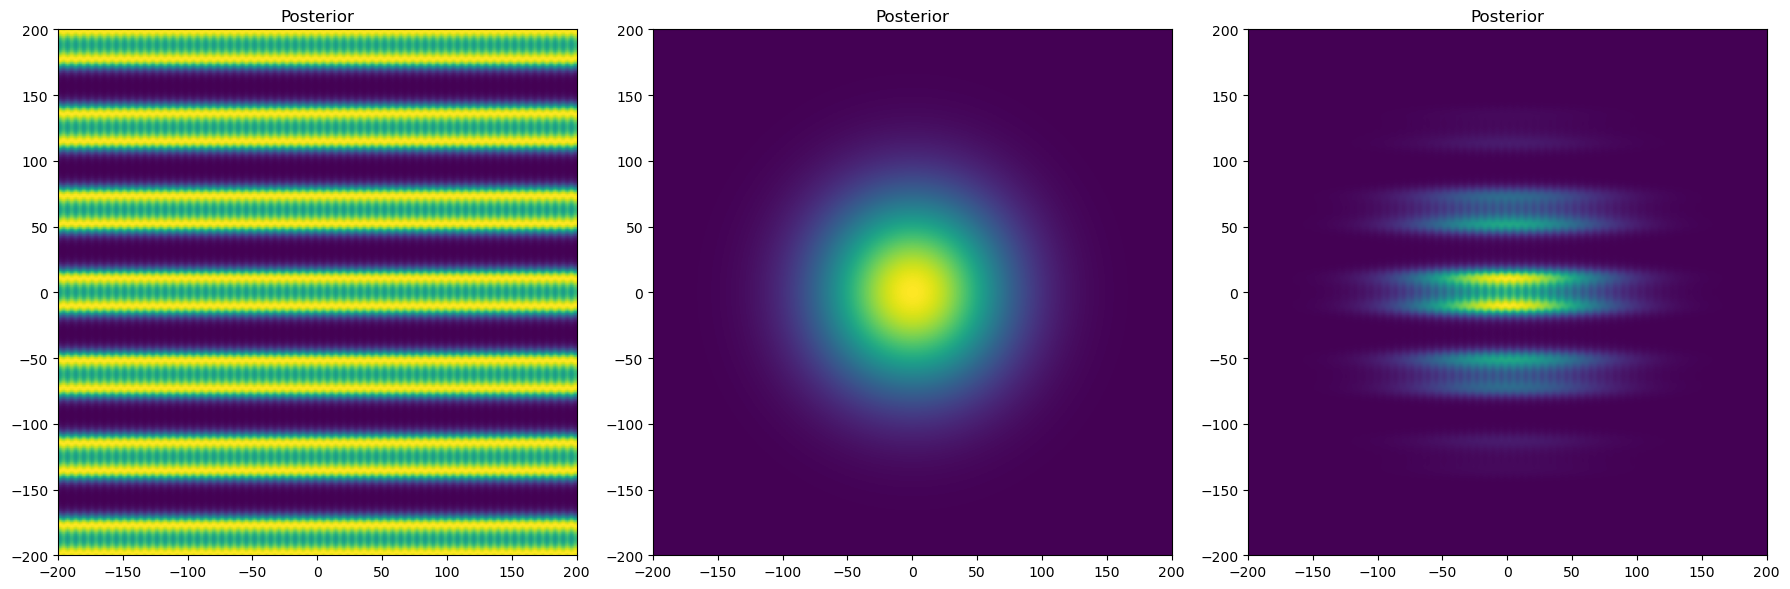

In [5]:
# Parameters
wave_dim = 2
log = True

# Likelihood
wave_y = 1.0  # observation
wave_gamma = 1.0  # noise standard deviation
def wave_forward(u):
    a = 0.1
    b = 2.0
    c = 1.0
    d = 0.1
    return (a * np.sin(c * u[0])) + (b * np.cos(d * u[1]))

# Prior
prior_means = [[0.0, 0.0]]
prior_stds = [[50.0, 50.0]]

wave = Sampling(dimension=wave_dim, forward_model=wave_forward, observed_data=wave_y, noise_std=wave_gamma, prior_means=prior_means, prior_stds=prior_stds, log=log)
wave.visualize(max_points=300, ranges=[(-200, 200), (-200, 200)], visuals=[wave.likelihood, wave.prior, wave.posterior])

## **Basic Metropolis-Hastings**

In this section we will test and visualize the results of MH algorithm.

### **Donut distribution (dim=2)**

**Parametrs for testing**

In [6]:
initial_cov = None
scale_factor = None
burnin = 0.2

donut_MH = MH(distribution=donut, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin)

**Sampling**

In [7]:
initial = None
N = 100000

donut_MH.sample(initial=initial, N=N)

**Visualization of obtained samples**

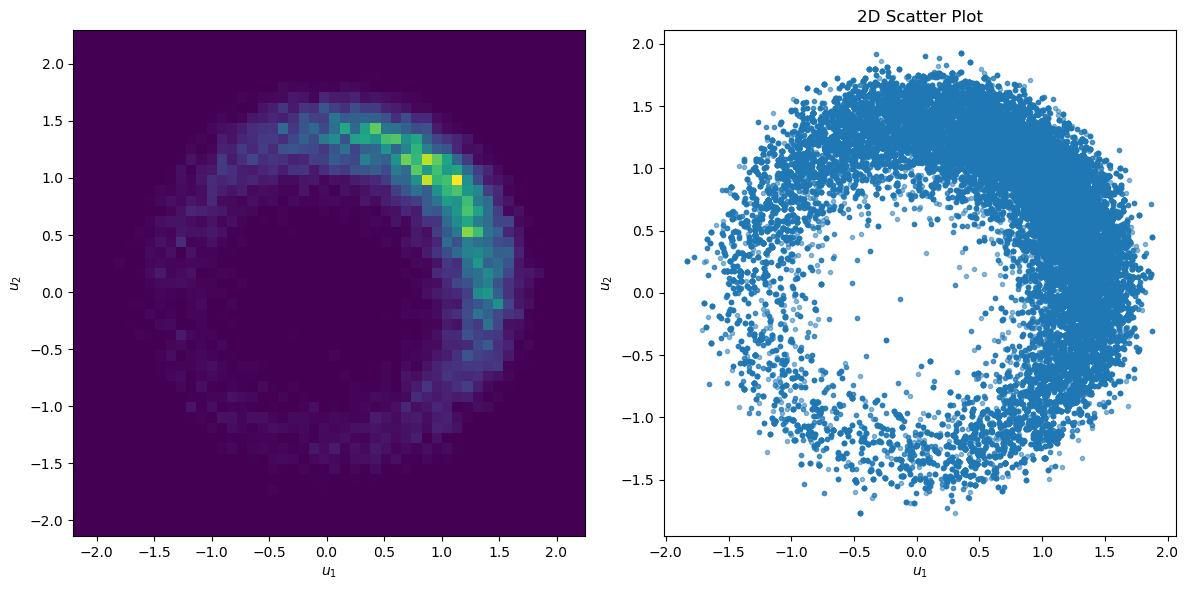

In [8]:
donut_MH.visualize([donut_MH.samples])

**Quality of sampling method**

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:305: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


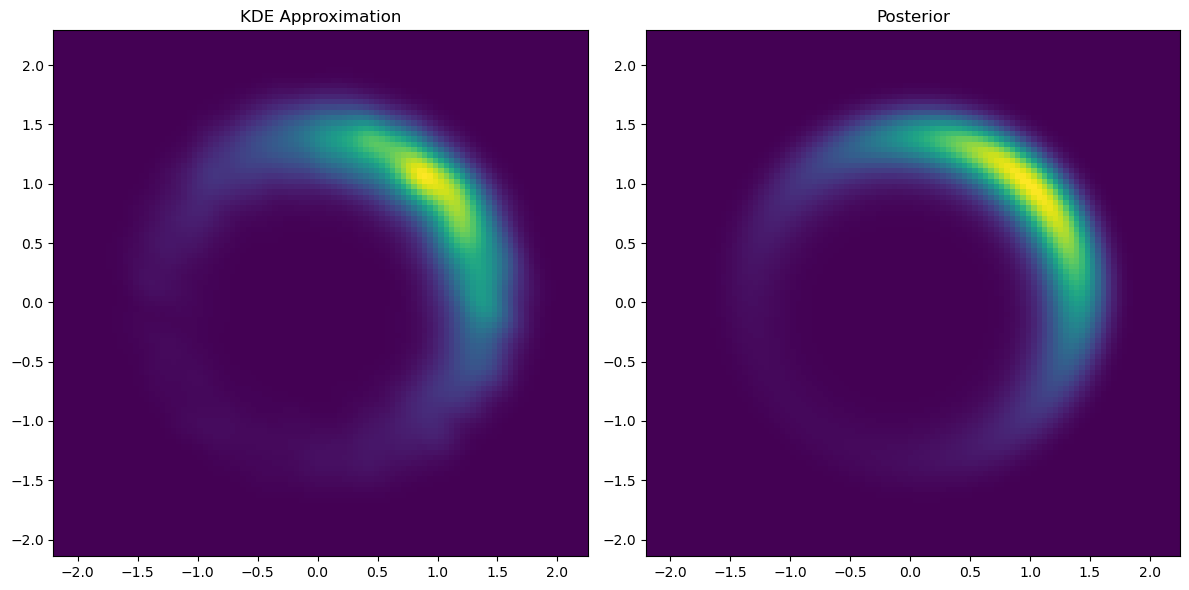

KL: 0.02566947704394791


In [9]:
print("KL:", donut_MH.sampling_quality(donut_MH.samples, visualise=True))

**Eficiency of the sampling method**

In [10]:
print(f"Acceptance rate: {(donut_MH.acc_rate * 100):.2f}%")

Acceptance rate: 10.53%


### **Banana distribution (dim=2)**

**Parametrs for testing**

In [11]:
initial_cov = None
scale_factor = None
burnin = 0.2

banana_MH = MH(distribution=banana, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin)

**Sampling**

In [12]:
initial = None
N = 100000

banana_MH.sample(initial=initial, N=N)

**Visualization of obtained samples**

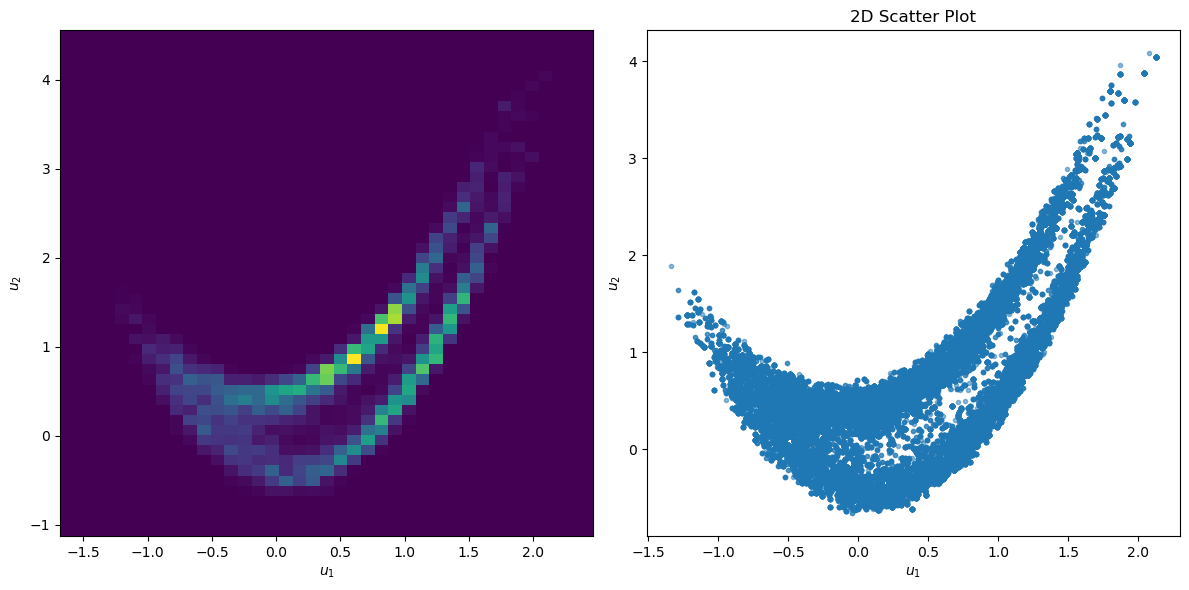

In [13]:
banana_MH.visualize(visuals=[banana_MH.samples])

**Quality of sampling method**

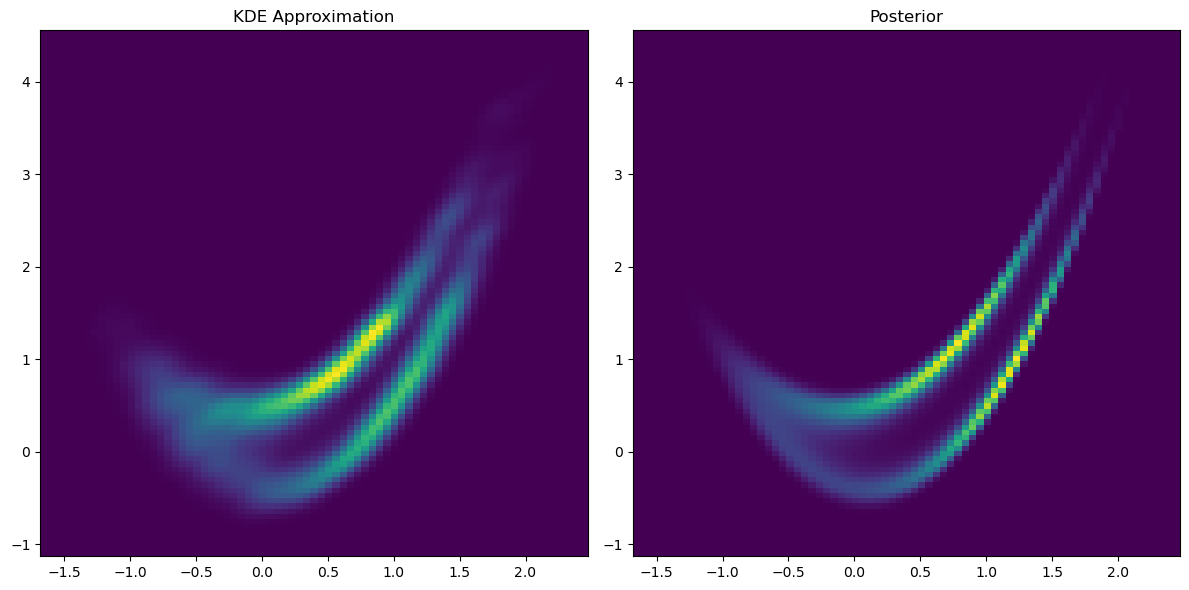

KL: 0.20210840019866894


In [14]:
print("KL:", banana_MH.sampling_quality(banana_MH.samples, visualise=True))

**Eficiency of the sampling method**

In [15]:
print(f"Acceptance rate: {(banana_MH.acc_rate * 100):.2f}%")

Acceptance rate: 6.80%


## **Adaptive Metropolis**

### **Banana distribution (dim=2)**

**Parametrs for testing**

In [16]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1

banana_AM = AM(distribution=banana, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin, eps=eps, update_step=update_step)

**Sampling**

In [17]:
initial = None
N = 100000

banana_AM.sample(initial=initial, N=N)

**Visualization of obtained samples**

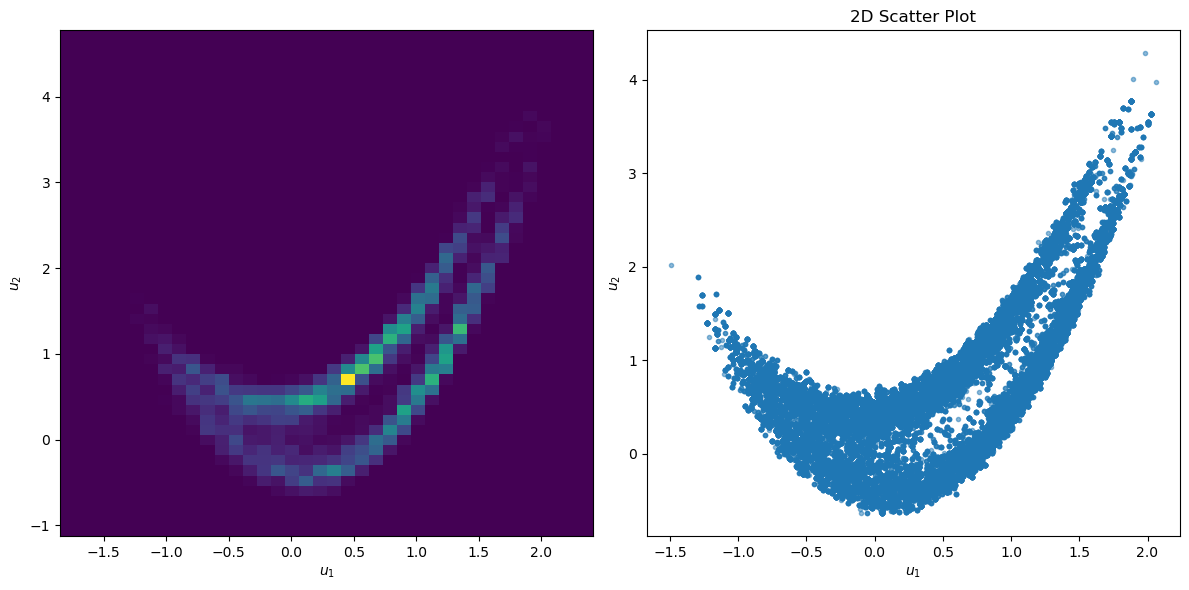

In [18]:
banana_AM.visualize(visuals=[banana_AM.samples])

**Quality of sampling method**

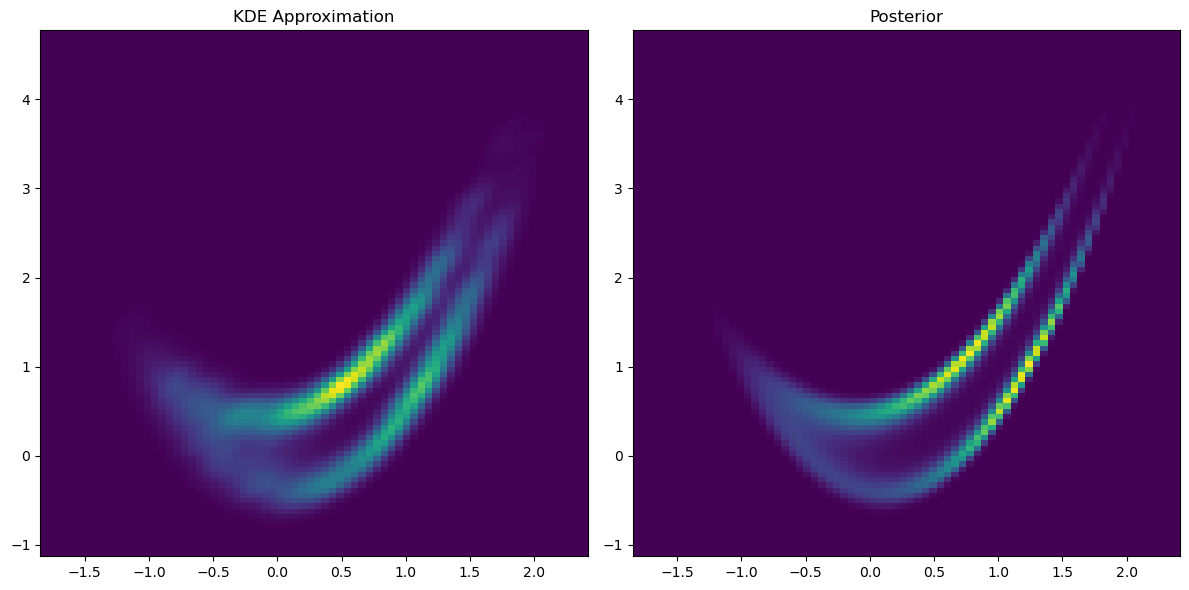

KL: 0.20440652703933898


In [19]:
print("KL:", banana_AM.sampling_quality(banana_AM.samples, visualise=True))

**Efficienty of the sampling method**

In [20]:
print(f"Acceptance rate: {(banana_AM.acc_rate * 100):.2f}%")

Acceptance rate: 5.87%


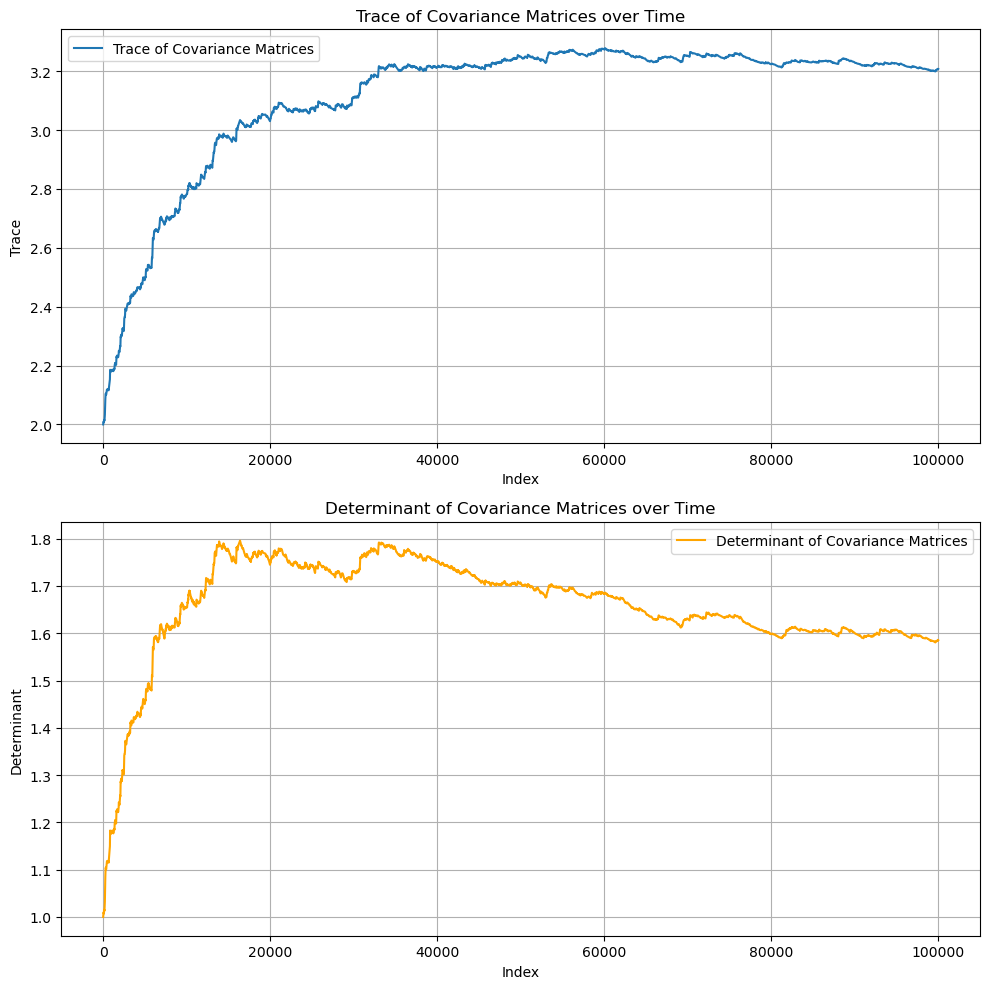

In [21]:
# Compute the trace of each covariance matrix
traces = [np.trace(matrix) for matrix in banana_AM.C]

# Compute the determinant of each covariance matrix (optional)
determinants = [np.linalg.det(matrix) for matrix in banana_AM.C]

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the trace of each covariance matrix
axs[0].plot(traces, label='Trace of Covariance Matrices')
axs[0].set_title('Trace of Covariance Matrices over Time')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Trace')
axs[0].legend()
axs[0].grid(True)

# Plot the determinant of each covariance matrix
axs[1].plot(determinants, label='Determinant of Covariance Matrices', color='orange')
axs[1].set_title('Determinant of Covariance Matrices over Time')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Determinant')
axs[1].legend()
axs[1].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## **DRAM**

### **Banana distribution (dim=2)**

**Parametrs for testing**

In [22]:
initial_cov = None
scale_factor = None
burnin = 0.2
eps = 1e-5
update_step = 1
gammas = None
num_stages = 3

banana_DRAM = DRAM(distribution=banana, initial_cov=initial_cov, scale_factor=scale_factor, burnin=burnin, eps=eps, update_step=update_step, gammas=gammas, num_stages=num_stages)

**Sampling**

In [23]:
initial = None
N = 100000

banana_DRAM.sample(initial=initial, N=N)

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1127: RuntimeWarning: divide by zero encountered in log1p
  numerator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[i:][::-1])))
g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1128: RuntimeWarning: divide by zero encountered in log1p
  denominator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[:len(stage_posterior) - i])))


**Visualization of obtained samples**

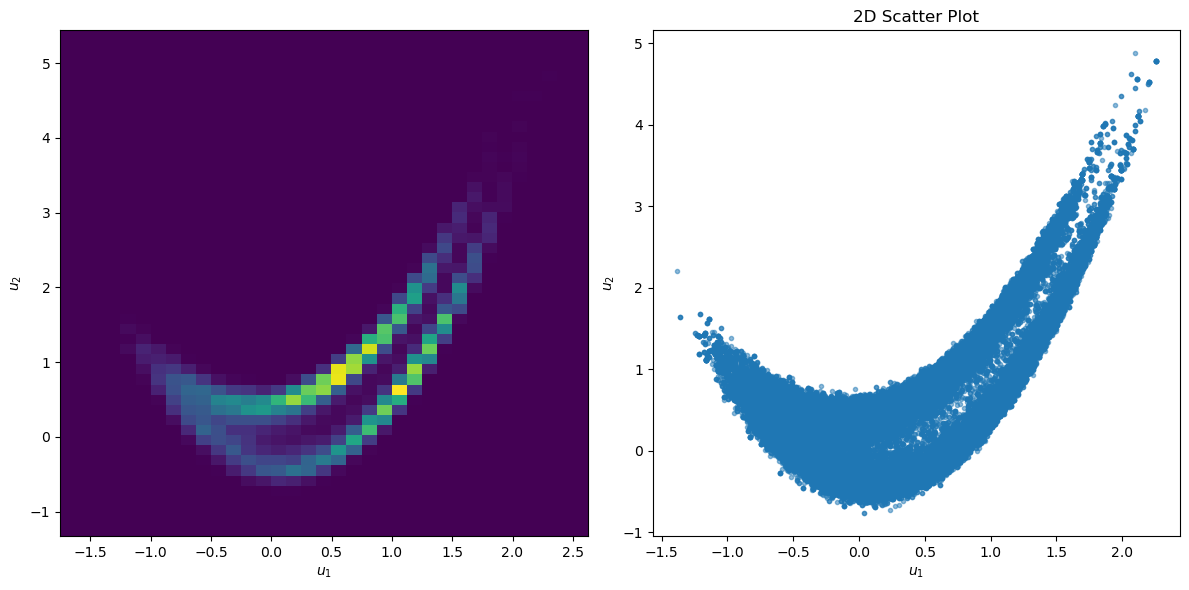

In [24]:
banana_DRAM.visualize([banana_DRAM.samples])

In [25]:
banana_DRAM.samples.ndim

2

**Quality of sampling method**

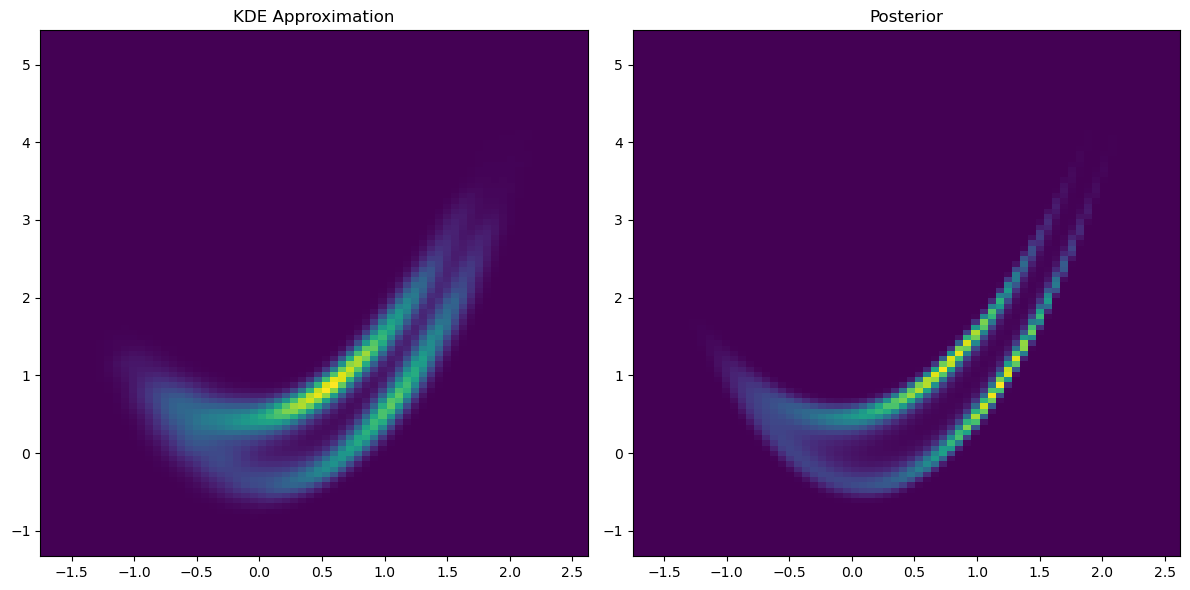

KL: 0.204066719091394


In [26]:
print("KL:", banana_DRAM.sampling_quality(banana_DRAM.samples, visualise=True))

**Efficienty of the sampling method**

In [27]:
for i, acc_rate in enumerate(banana_DRAM.acc_rate):
    print(f"Acceptance rate for stage {i+1}: {(acc_rate * 100):.2f}%")
print(f"Acceptance rate: {(sum(banana_DRAM.acc[:,1])/len(banana_DRAM.samples)) * 100:.2f}%")

Acceptance rate for stage 1: 5.83%
Acceptance rate for stage 2: 9.54%
Acceptance rate for stage 3: 14.02%
Acceptance rate: 26.76%


## **DREAM**

### **Donut distribution (dim=2)**

**Parametrs**

In [28]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 3
outlier_detection = True

donut_DREAM = DREAM(distribution=donut, chains=chains, scale_factor=scale_factor, burnin=burnin, nCR=nCR, max_pairs=max_pairs, eps=eps, num_stages=num_stages, outlier_detection=outlier_detection)

**Sampling**

In [29]:
initial = None
N = 100000

donut_DREAM.sample(initial=initial, N=N)

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1322: RuntimeWarning: divide by zero encountered in log1p
  numerator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[i:][::-1])))
g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1323: RuntimeWarning: divide by zero encountered in log1p
  denominator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[:len(stage_posterior) - i])))


**Visualization of obtained samples**

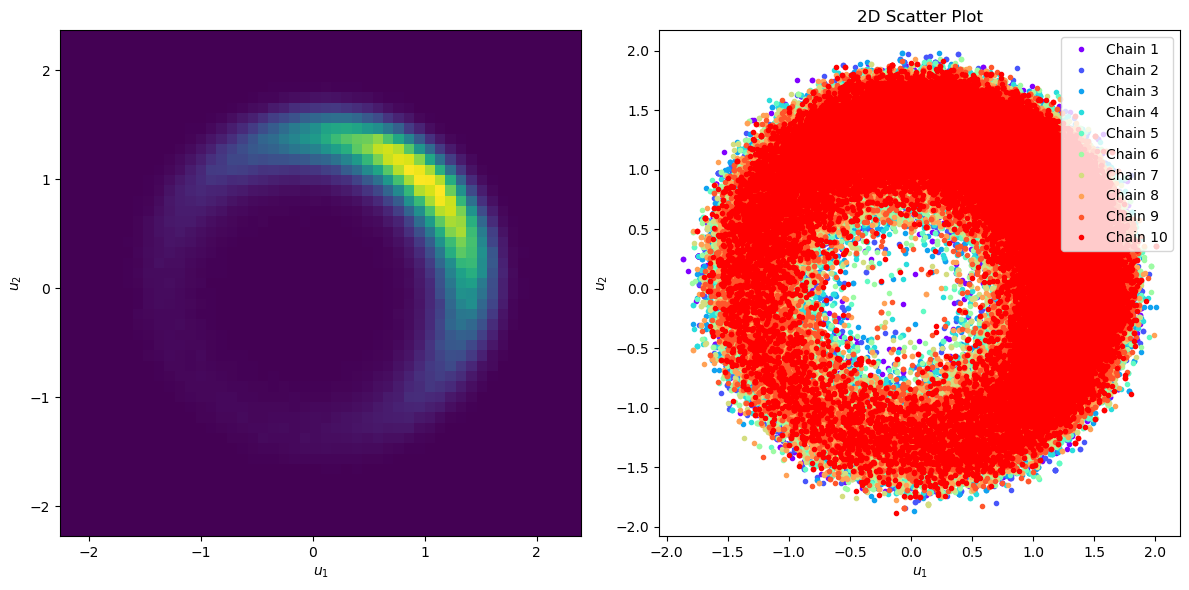

In [30]:
donut_DREAM.visualize(visuals=[donut_DREAM.samples])

**Quality of sampling method**

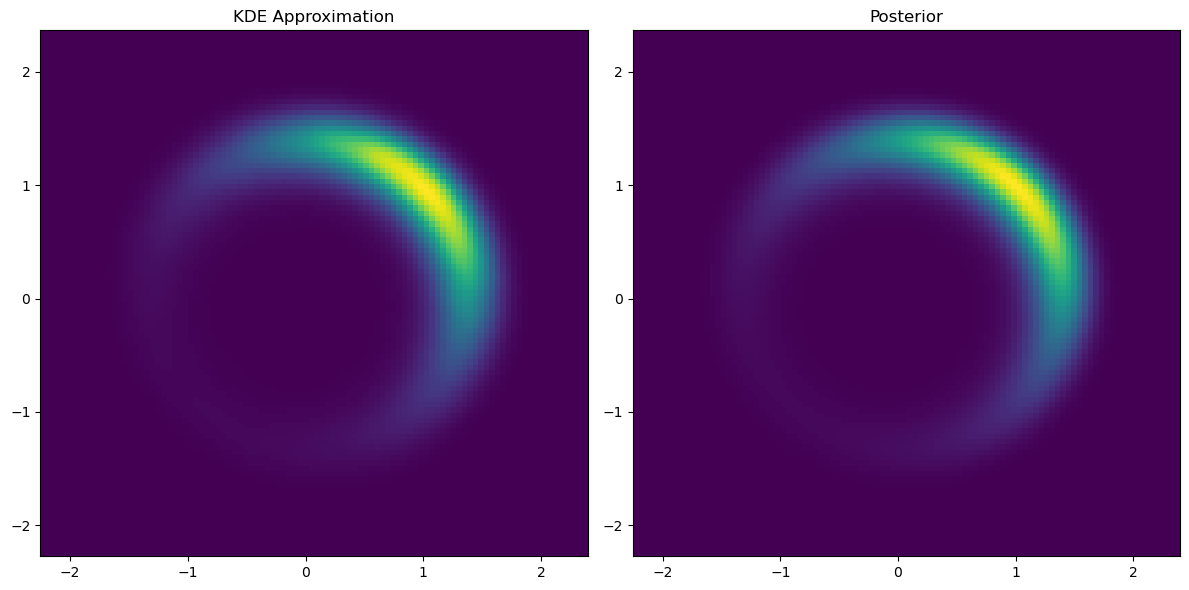

KL: 0.004533246161871292


In [31]:
print("KL:", donut_DREAM.sampling_quality(donut_DREAM.samples, visualise=True))

**Efficienty of the sampling method**

In [32]:
for chain in range(donut_DREAM.chains):
    for stage, acc_rate in enumerate(donut_DREAM.acc_rate[chain,:]):
        print(f"Acceptance rate for chain {chain+1}, stage {stage+1}: {(acc_rate * 100):.2f}%")
    print(f"Acceptance rate for chain {chain+1}: {((sum(donut_DREAM.acc[chain,:,1])/len(donut_DREAM.samples))*100):.2f}%")
    print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(donut_DREAM.acc[:,:,1])/(len(donut_DREAM.samples)*donut_DREAM.chains))*100):.2f}%")

Acceptance rate for chain 1, stage 1: 31.54%
Acceptance rate for chain 1, stage 2: 44.62%
Acceptance rate for chain 1, stage 3: 58.16%
Acceptance rate for chain 1: 84.14%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 2, stage 1: 31.52%
Acceptance rate for chain 2, stage 2: 44.33%
Acceptance rate for chain 2, stage 3: 58.36%
Acceptance rate for chain 2: 84.12%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 3, stage 1: 31.64%
Acceptance rate for chain 3, stage 2: 44.08%
Acceptance rate for chain 3, stage 3: 58.30%
Acceptance rate for chain 3: 84.06%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 4, stage 1: 31.33%
Acceptance rate for chain 4, stage 2: 43.77%
Acceptance rate for chain 4, stage 3: 58.23%
Acceptance rate for chain 4: 83.87%
----------------------------------------------

In [34]:
print("nCR", donut_DREAM.nCR)
print("p_a", donut_DREAM.p_a)
print("h_a", donut_DREAM.h_a)
print("Delta_a", donut_DREAM.Delta_a)

print("R_hat", donut_DREAM.R_hat)
print("outlier_resets", donut_DREAM.outlier_resets)

nCR 3
p_a [0.19597819 0.35050362 0.45351819]
h_a [ 534837.  854642. 1067011.]
Delta_a [ 81293.35021195 230452.90045251 376383.77942739]
R_hat [1.00020448 1.00057301]
outlier_resets 0


### **Banana distribution (dim=2)**

**Parametrs**

In [35]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 3
outlier_detection = True

banana_DREAM = DREAM(distribution=banana, chains=chains, scale_factor=scale_factor, burnin=burnin, nCR=nCR, max_pairs=max_pairs, eps=eps, num_stages=num_stages, outlier_detection=outlier_detection)

**Sampling**

In [36]:
initial = None
N = 100000

banana_DREAM.sample(initial=initial, N=N)

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1322: RuntimeWarning: divide by zero encountered in log1p
  numerator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[i:][::-1])))
g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1323: RuntimeWarning: divide by zero encountered in log1p
  denominator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[:len(stage_posterior) - i])))


**Visualization of obtained samples**

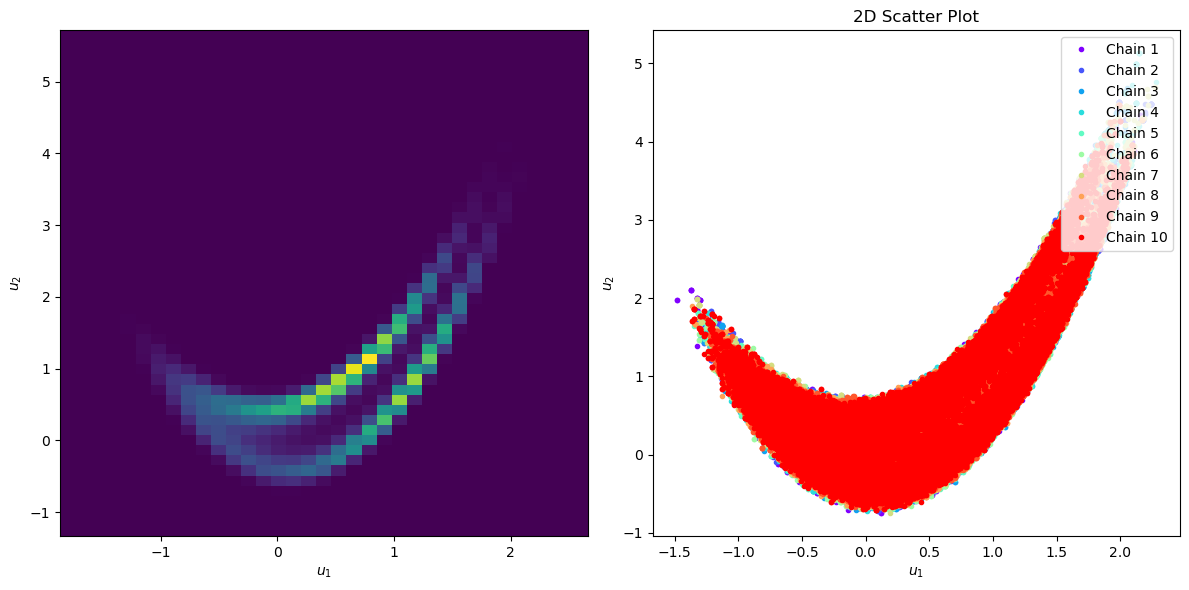

In [37]:
banana_DREAM.visualize(visuals=[banana_DREAM.samples])

**Quality of sampling method**

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:305: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


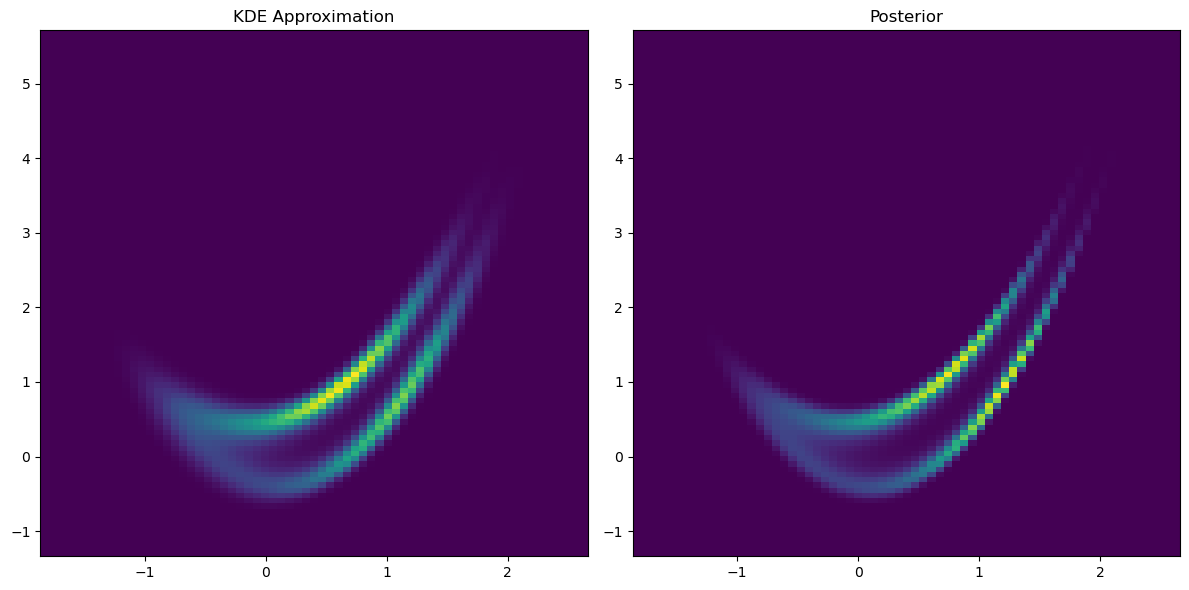

KL: 0.09555681370934144


In [38]:
print("KL:", banana_DREAM.sampling_quality(banana_DREAM.samples, visualise=True))

**Efficienty of the sampling method**

In [39]:
for chain in range(banana_DREAM.chains):
    for stage, acc_rate in enumerate(banana_DREAM.acc_rate[chain,:]):
        print(f"Acceptance rate for chain {chain+1}, stage {stage+1}: {(acc_rate * 100):.2f}%")
    print(f"Acceptance rate for chain {chain+1}: {((sum(banana_DREAM.acc[chain,:,1])/len(banana_DREAM.samples))*100):.2f}%")
    print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(banana_DREAM.acc[:,:,1])/(len(banana_DREAM.samples)*banana_DREAM.chains))*100):.2f}%")

Acceptance rate for chain 1, stage 1: 23.23%
Acceptance rate for chain 1, stage 2: 31.95%
Acceptance rate for chain 1, stage 3: 39.76%
Acceptance rate for chain 1: 68.53%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 2, stage 1: 23.59%
Acceptance rate for chain 2, stage 2: 32.03%
Acceptance rate for chain 2, stage 3: 39.58%
Acceptance rate for chain 2: 68.62%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 3, stage 1: 23.57%
Acceptance rate for chain 3, stage 2: 32.18%
Acceptance rate for chain 3, stage 3: 39.27%
Acceptance rate for chain 3: 68.52%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 4, stage 1: 23.74%
Acceptance rate for chain 4, stage 2: 32.60%
Acceptance rate for chain 4, stage 3: 39.85%
Acceptance rate for chain 4: 69.08%
----------------------------------------------

In [40]:
print("nCR", banana_DREAM.nCR)
print("p_a", banana_DREAM.p_a)
print("h_a", banana_DREAM.h_a)
print("Delta_a", banana_DREAM.Delta_a)

print("R_hat", banana_DREAM.R_hat)
print("outlier_resets", banana_DREAM.outlier_resets)

nCR 3
p_a [0.17887454 0.34341037 0.47771509]
h_a [ 551107.  924898. 1233783.]
Delta_a [ 45997.92890128 147501.46732499 280152.76300677]
R_hat [1.00033054 1.00044791]
outlier_resets 0


### **Wave distribution (dim=2)**

**Parametrs**

In [41]:
chains = None
scale_factor = None
burnin = 0.2
nCR = 3
max_pairs = 3
eps = 1e-5
num_stages = 3
outlier_detection = True

wave_DREAM = DREAM(distribution=wave, chains=chains, scale_factor=scale_factor, burnin=burnin, nCR=nCR, max_pairs=max_pairs, eps=eps, num_stages=num_stages, outlier_detection=outlier_detection)

**Sampling**

In [42]:
initial = None
N = 100000

wave_DREAM.sample(initial=initial, N=N)

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1322: RuntimeWarning: divide by zero encountered in log1p
  numerator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[i:][::-1])))
g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:1323: RuntimeWarning: divide by zero encountered in log1p
  denominator += np.log1p(-np.exp(self._acceptance_probability(stage_posterior[:len(stage_posterior) - i])))


**Visualization of obtained samples**

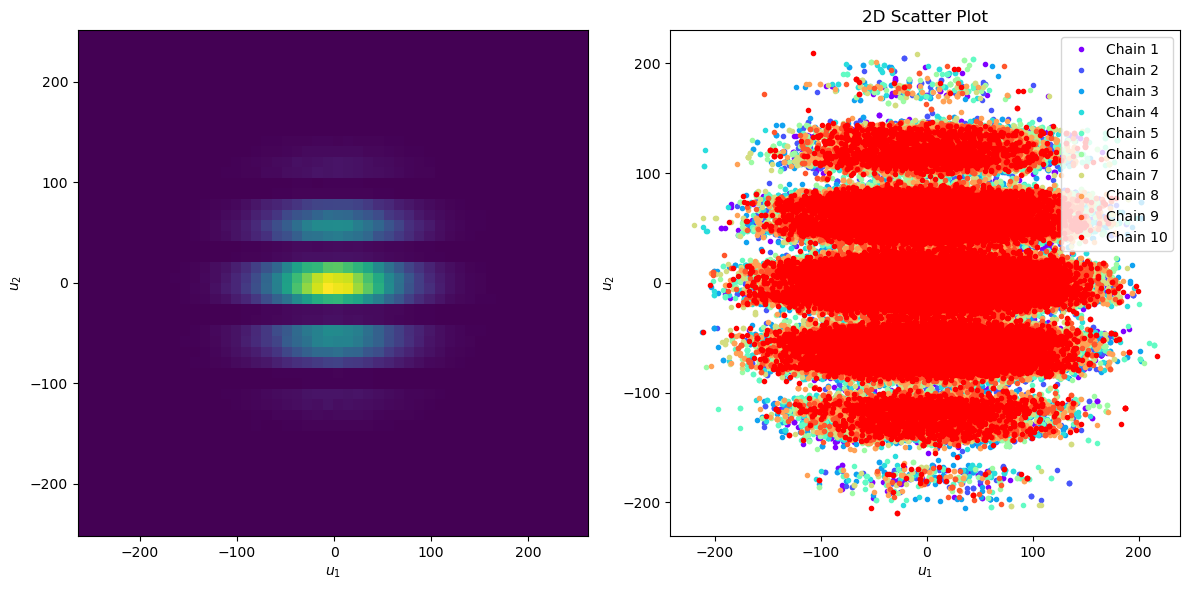

In [43]:
wave_DREAM.visualize(visuals=[wave_DREAM.samples])

**Quality of sampling method**

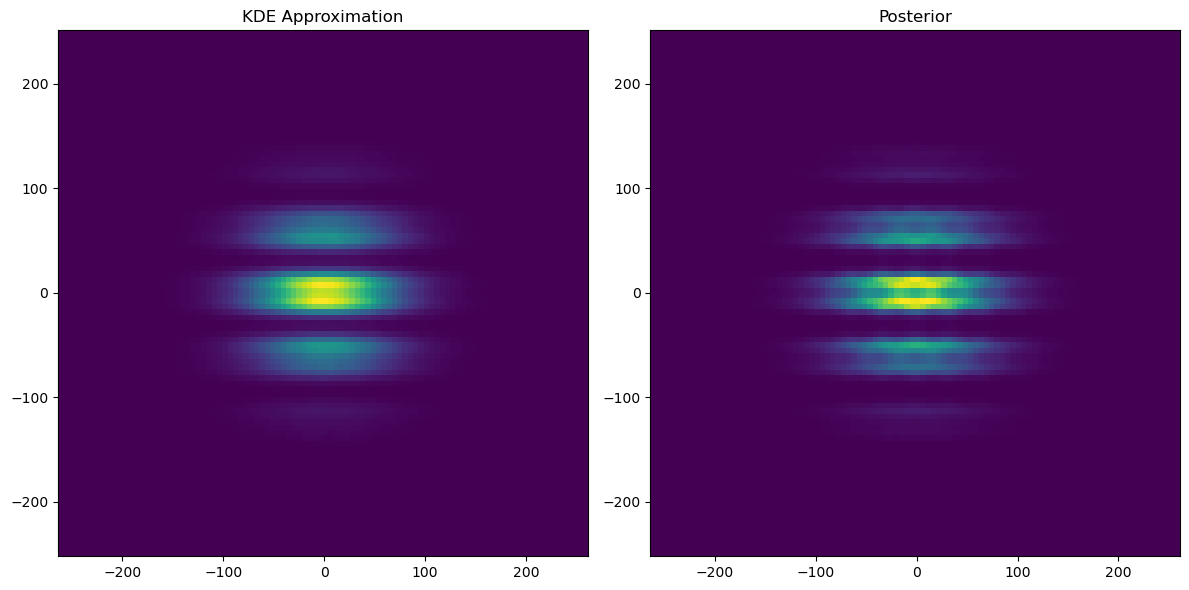

KL: 0.035334028671208675


In [44]:
print("KL:", wave_DREAM.sampling_quality(wave_DREAM.samples, visualise=True))

**Efficienty of the sampling method**

In [45]:
for chain in range(wave_DREAM.chains):
    for stage, acc_rate in enumerate(wave_DREAM.acc_rate[chain,:]):
        print(f"Acceptance rate for chain {chain+1}, stage {stage+1}: {(acc_rate * 100):.2f}%")
    print(f"Acceptance rate for chain {chain+1}: {((sum(wave_DREAM.acc[chain,:,1])/len(wave_DREAM.samples))*100):.2f}%")
    print("-----------------------------------------------------------------------------------------")
print(f"Acceptance rate: {((np.sum(wave_DREAM.acc[:,:,1])/(len(wave_DREAM.samples)*wave_DREAM.chains))*100):.2f}%")

Acceptance rate for chain 1, stage 1: 40.40%
Acceptance rate for chain 1, stage 2: 50.51%
Acceptance rate for chain 1, stage 3: 57.45%
Acceptance rate for chain 1: 87.45%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 2, stage 1: 40.19%
Acceptance rate for chain 2, stage 2: 50.14%
Acceptance rate for chain 2, stage 3: 57.87%
Acceptance rate for chain 2: 87.44%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 3, stage 1: 40.39%
Acceptance rate for chain 3, stage 2: 50.05%
Acceptance rate for chain 3, stage 3: 57.34%
Acceptance rate for chain 3: 87.30%
-----------------------------------------------------------------------------------------
Acceptance rate for chain 4, stage 1: 40.31%
Acceptance rate for chain 4, stage 2: 50.05%
Acceptance rate for chain 4, stage 3: 57.48%
Acceptance rate for chain 4: 87.32%
----------------------------------------------

In [46]:
print("nCR", wave_DREAM.nCR)
print("p_a", wave_DREAM.p_a)
print("h_a", wave_DREAM.h_a)
print("Delta_a", wave_DREAM.Delta_a)

print("R_hat", wave_DREAM.R_hat)
print("outlier_resets", wave_DREAM.outlier_resets)

nCR 3
p_a [0.22112521 0.36173356 0.41714123]
h_a [539643. 806468. 911942.]
Delta_a [171517.39309804 418476.64960949 559299.1970498 ]
R_hat [1.00017812 1.00016893]
outlier_resets 0


In [47]:
wave_DREAM.samples.shape

(100000, 10, 2)

In [48]:
dimension = 2
max_pairs = 3
scale_factor = 2.38
chains = 10
eps1 = 1e-5

def propose_point(current, chain, gen, CR, gam):
        """
        Generates a candidate point for the given chain using differential evolution.

        Parameters:
        - current: Current population of points.
        - chain: Index of the chain to generate a proposal for.
        - gen: Current generation number.

        Returns:
        - proposal_point: Proposed point for the given chain
        """
        
        d = dimension
        proposal_point = current[chain].copy()
        num_pairs = np.random.randint(1, max_pairs + 1)

        randomized_dimensions = np.random.permutation(dimension)

        for i in randomized_dimensions:
            if np.random.rand() < CR:
                if gen % 5 == 0:
                    gamma = 1.0
                else:
                    gamma = scale_factor / np.sqrt(2*num_pairs*d)

                diff = 0
                for _ in range(num_pairs):
                    indices = np.random.choice([x for x in range(chains) if x != chain] ,dimension, replace=False)
                    diff += current[indices[0]][i] - current[indices[1]][i]

                e = np.random.uniform(-eps1, eps1)
                eps = np.random.normal(0, eps1)
                proposal_point[i] = current[chain][i] + ((1 + e) * (gamma * diff) * gam) + eps
            else:
                d -= 1

        return proposal_point

In [49]:
N = 1000
current = wave_DREAM.samples[-2,:,:]
current

array([[129.44708529, -15.87762489],
       [-24.70451349, -42.13296989],
       [ 59.3594701 ,  51.10137761],
       [ 86.87237244, -21.04596183],
       [ 13.83353178, -52.75397917],
       [ -3.42951818, -47.50719242],
       [ 30.5829366 , -57.76549818],
       [-10.99516198,  73.97637452],
       [-13.34921385, 110.45534805],
       [  5.36170351,  82.94458951]])

44020.93688639139
79153.65588054806


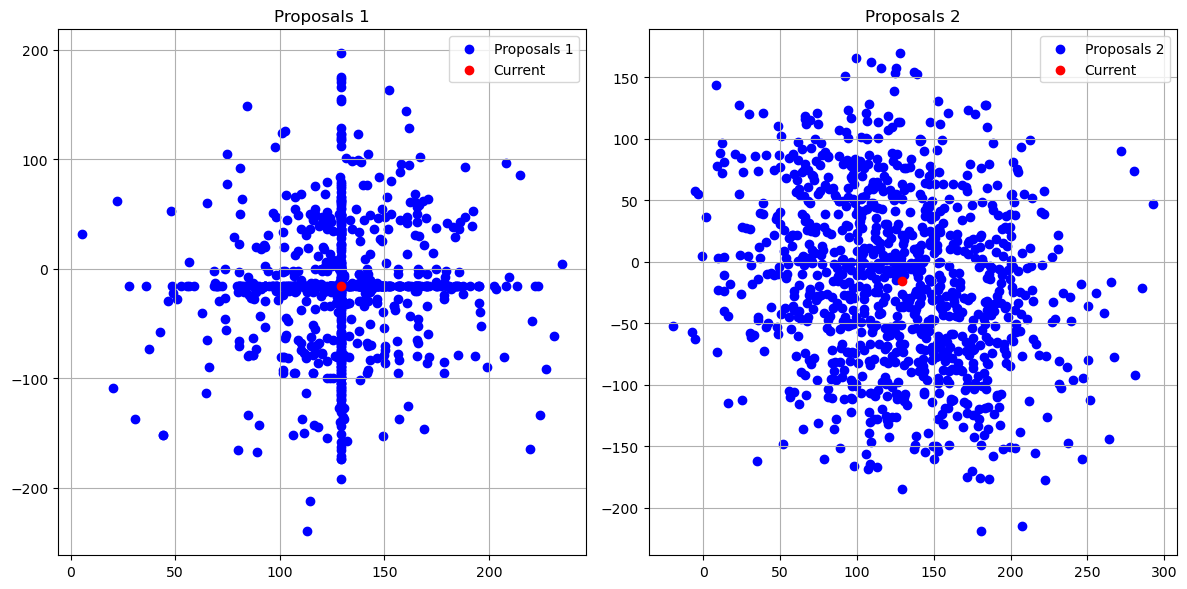

In [50]:
import matplotlib.pyplot as plt

gam = 0.5
diff = 0

scale_factor2 = (2.4**2) / dimension
C = (scale_factor * np.cov(current, rowvar=False)) + (scale_factor * eps1 * np.eye(dimension))
diff2 = 0

proposals1 = []
proposals2 = []

for i in range(N):
    proposal = propose_point(current=current, chain=0, gen=0, CR=0.6, gam=gam)
    diff += np.linalg.norm(proposal - current[0])
    proposals1.append(proposal)
    
    proposal2 = np.random.multivariate_normal(current[0], gam * C)
    #proposal2 = propose_point(current=current, chain=0, gen=0, CR=0.6, gam=1.0)
    diff2 += np.linalg.norm(proposal2 - current[0])
    proposals2.append(proposal2)

print(diff)
print(diff2)

# Convert lists to numpy arrays for plotting
proposals1 = np.array(proposals1)
proposals2 = np.array(proposals2)

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first set of proposals
axs[0].scatter(proposals1[:, 0], proposals1[:, 1], color='blue', label='Proposals 1')
axs[0].scatter(current[0, 0], current[0, 1], color='red', label='Current')
axs[0].set_title('Proposals 1')
axs[0].legend()
axs[0].grid(True)

# Plot the second set of proposals
axs[1].scatter(proposals2[:, 0], proposals2[:, 1], color='blue', label='Proposals 2')
axs[1].scatter(current[0, 0], current[0, 1], color='red', label='Current')
axs[1].set_title('Proposals 2')
axs[1].legend()
axs[1].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Chain movement**

In [ ]:
# Example usage (if part of a class)
#wave.animate_chain_movement(wave_DREAM.samples[:500, 0, :])

# NOTES

- remake visualize function --- (done)
    - split into subfunctions --- (done)
    - fix smaller issues --- (done)
    - easy to call --- (done)
    - adapt for Sampling algorithm classes --- (done)
- remake sampling algorithms into classes --- (done)
    - remake MH --- (done)
    - remake AM --- (done)
        - fix recursive formula in AM --- (done)
    - reamke DRAM --- (done)
        - add i-th stage proposal for DRAM --- (done)
        - fix acceptance_probability --- (done)
    - remake DREAM --- (done)
        - fix outlier detection --- (done)
        - add improve CR distribution --- (done)
        - add i-th stage proposal --- (done)
        - add initial population from prior --- (done)
        - Gelman-Rubin metric --- (done)
    - rework acc_rate --- (done)
- fix animate function --- (done)
- update function descriptions --- (done)
- remake posterior into log posterior --- (done)
    - allow both posterior and log_posterior --- (done)
    - auto create of likelihood and prior and combined posterior --- (done)
        - gaussian mulitimodal multinormal prior --- (done)
    - rework acceptance prob in all sampling algorithms --- (done)
-----------------------------------------------------------------------------------------------

- write theory for sampling algorithms --- (done)
    - MH --- (done)
    - AM --- (done)
    - DRAM --- (done)
    - DREAM --- (done)
- create high dimension distribution (multi-normal prolly)
- sampling_quality
    - create for N dimensions --- (done)
    - fix grid for sampling quality
    - add functionality for high dimension
        - monte carlo integration for only Gaussian distribution (to draw samples from without MCMC algorithm for comparison using KL divergence)
- create easy to use benchmark for each and all sampling algorithms
    - add ESS metric
    - monitor acc_rate for all stages in DR
    - add count for function evaluation and key parts of the algorithm
